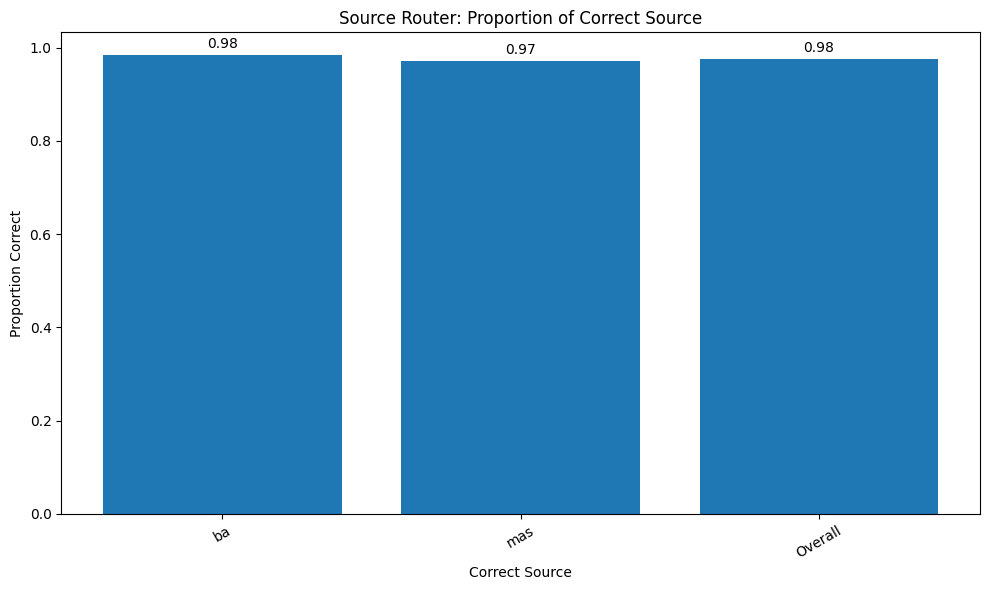

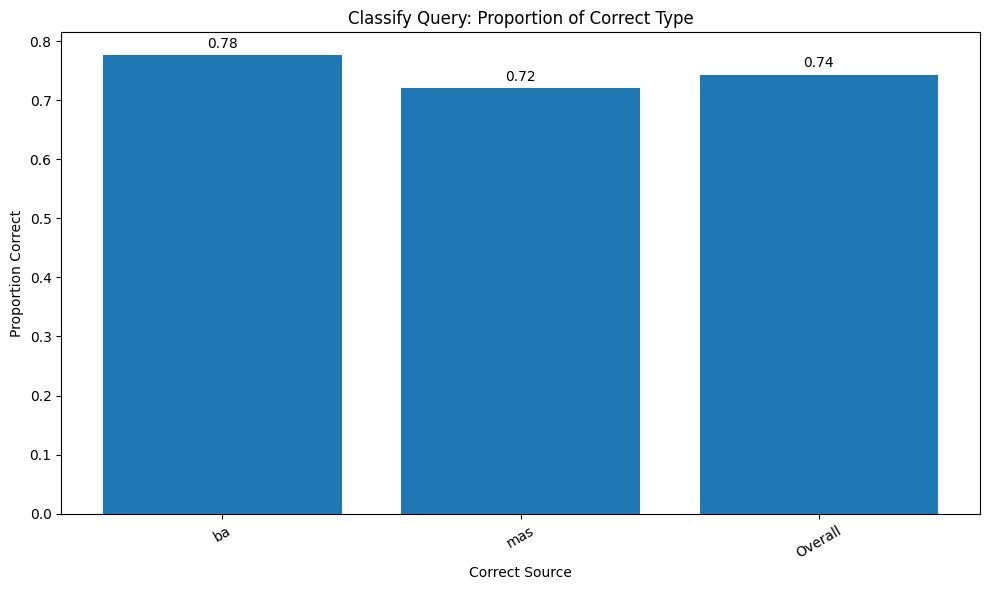

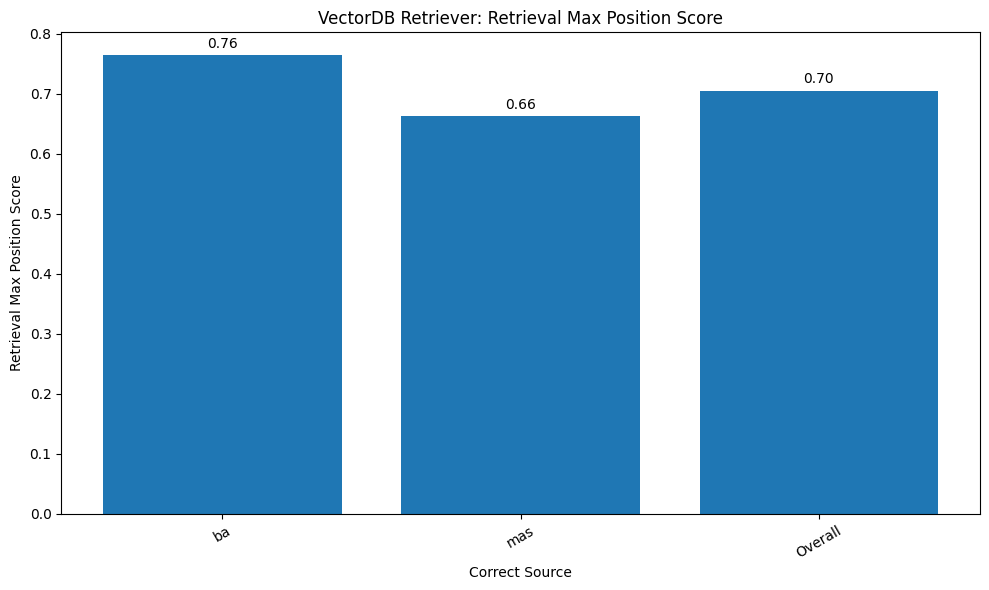

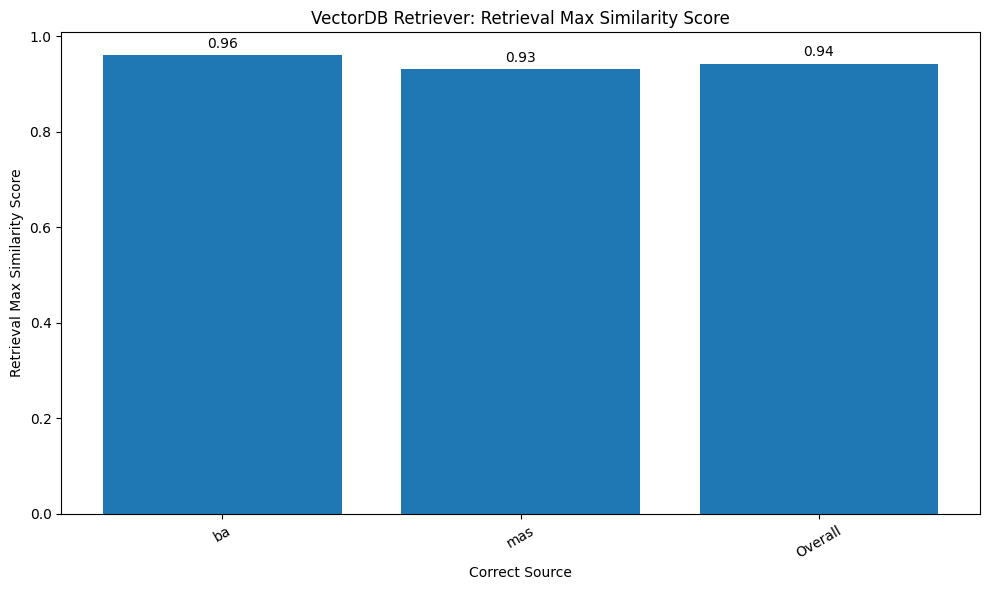

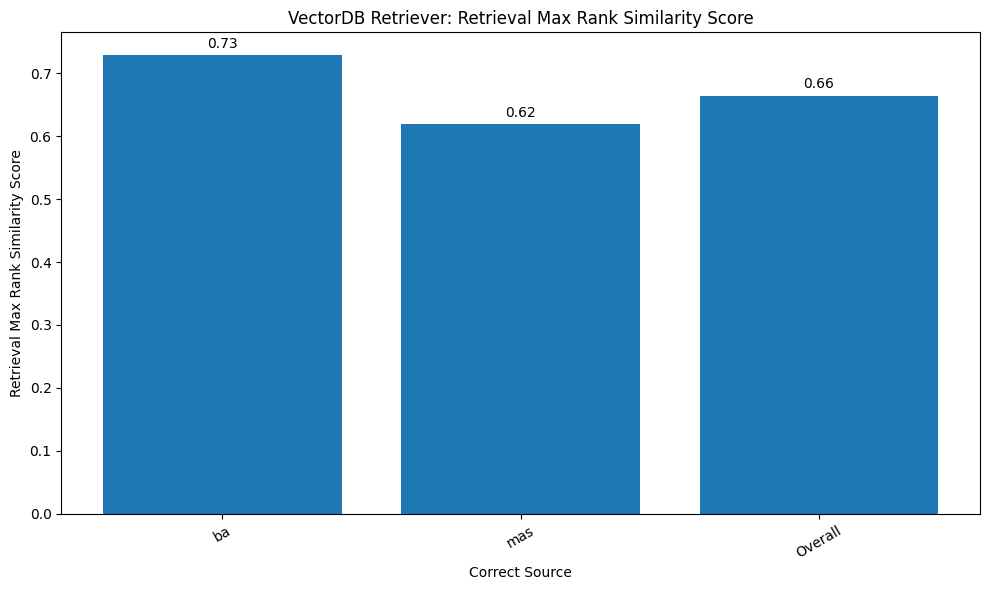

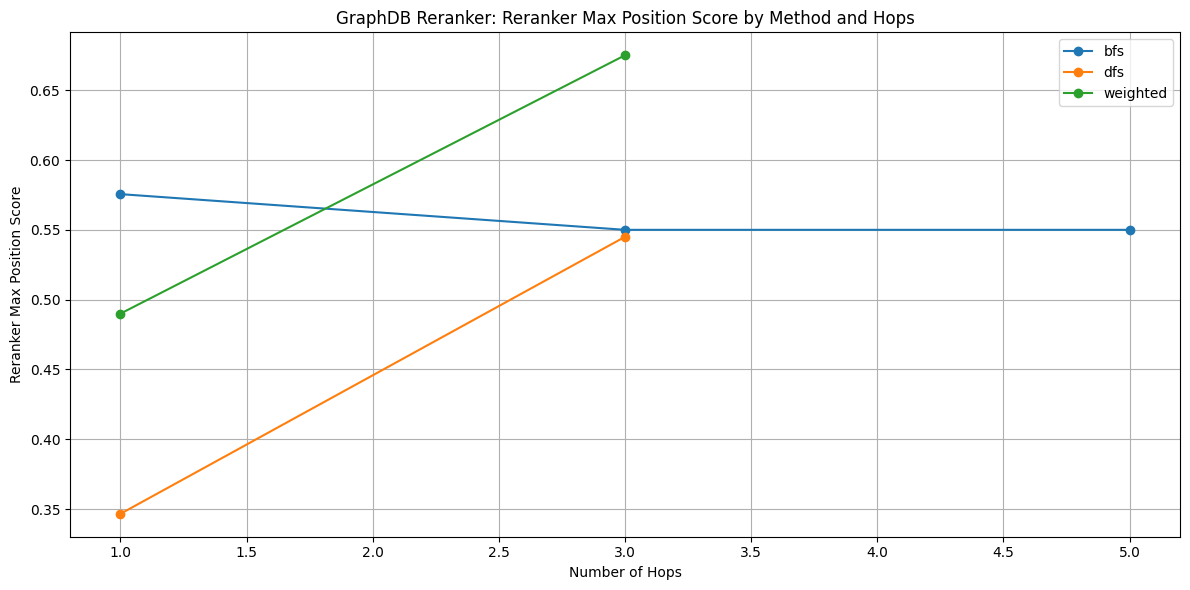

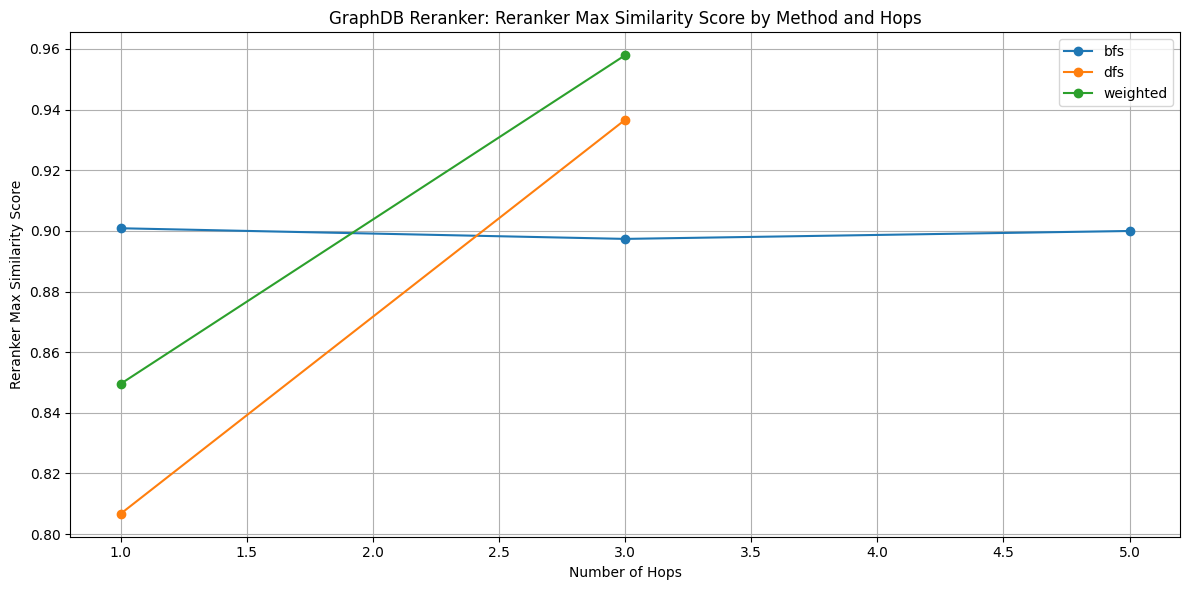

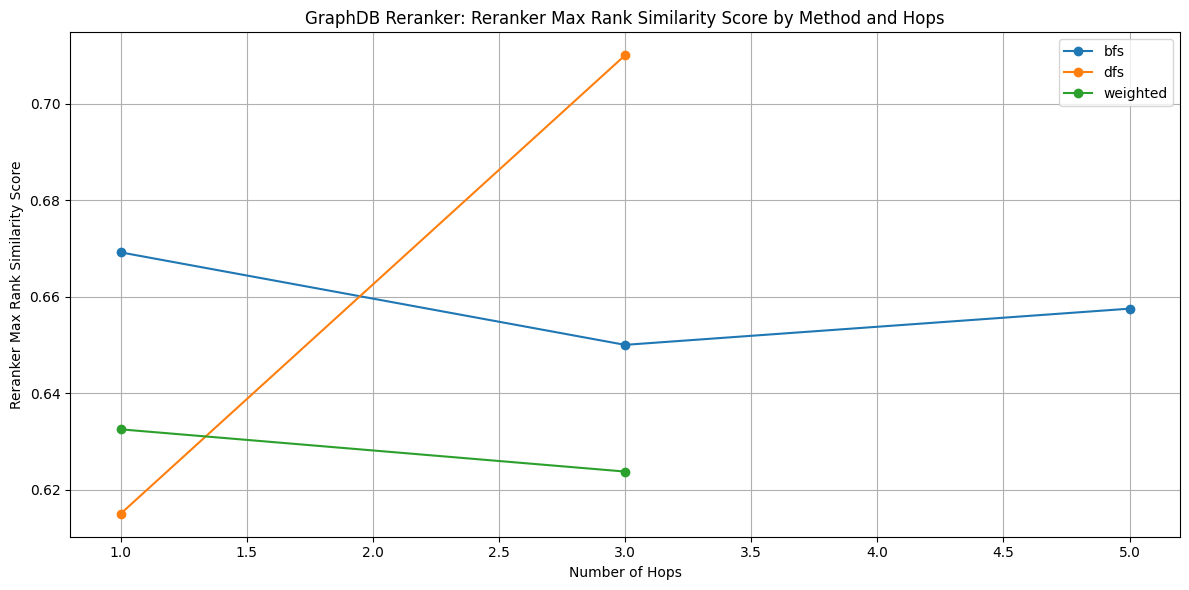

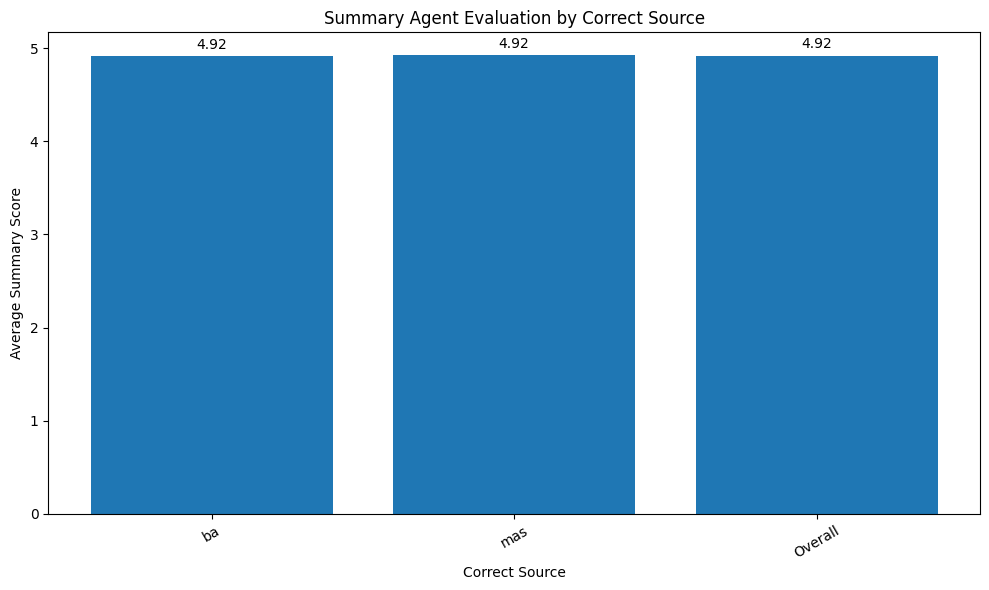

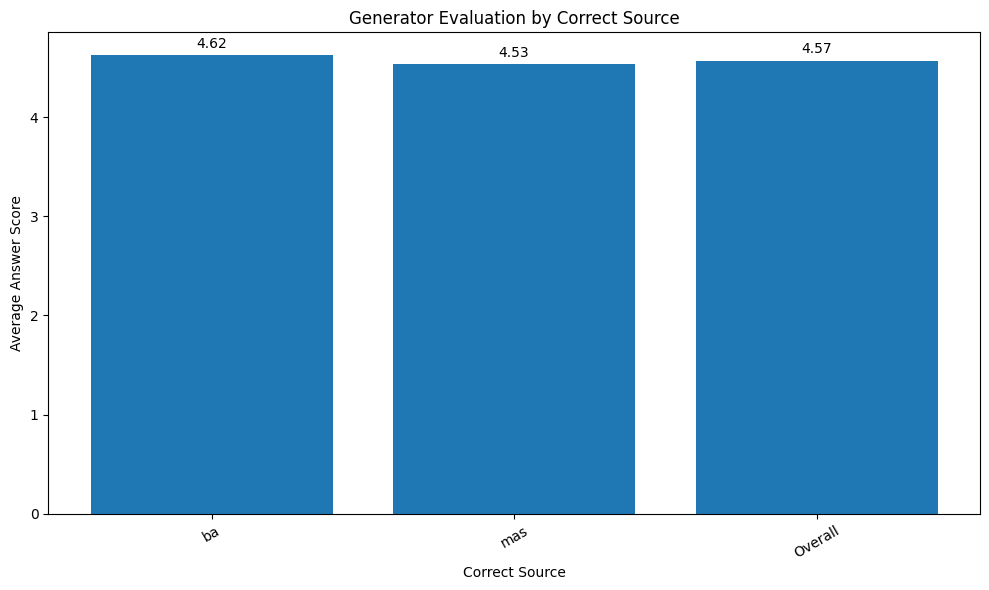

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV
df = pd.read_csv("dsa4265 evaluation - final.csv")

# Convert relevant columns to numeric
cols_to_numeric = [
    'is_source_correct', 'is_type_correct',
    'retrieval_max_position_score', 'retrieval_max_similarity_score', 'retrieval_max_rank_similarity_score',
    'reranker_max_position_score', 'reranker_max_similarity_score', 'reranker_max_rank_similarity_score',
    'summary_score', 'answer_score'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to plot bar charts
def plot_bar(data, x, y, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data[x], data[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# 1. Source Router Evaluation
source_router_eval = df.groupby('correct_source')['is_source_correct'].mean().reset_index()
source_router_eval.loc[len(source_router_eval)] = ['Overall', df['is_source_correct'].mean()]
plot_bar(source_router_eval, 'correct_source', 'is_source_correct',
         'Source Router: Proportion of Correct Source',
         'Correct Source', 'Proportion Correct', rotation=30)

# 2. Classify Query Evaluation
classify_query_eval = df.groupby('correct_source')['is_type_correct'].mean().reset_index()
classify_query_eval.loc[len(classify_query_eval)] = ['Overall', df['is_type_correct'].mean()]
plot_bar(classify_query_eval, 'correct_source', 'is_type_correct',
         'Classify Query: Proportion of Correct Type',
         'Correct Source', 'Proportion Correct', rotation=30)

# 3. VectorDB Retriever Evaluation (grouped bar chart)
vector_scores = df.groupby('correct_source')[
    ['retrieval_max_position_score',
     'retrieval_max_similarity_score',
     'retrieval_max_rank_similarity_score']
].mean().reset_index()

# Add overall row
overall_vector_scores = df[
    ['retrieval_max_position_score',
     'retrieval_max_similarity_score',
     'retrieval_max_rank_similarity_score']
].mean()
vector_scores.loc[len(vector_scores)] = ['Overall'] + overall_vector_scores.tolist()

# Plotting
labels = vector_scores['correct_source']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, vector_scores['retrieval_max_position_score'], width, label='Max Position Score')
bar2 = ax.bar(x, vector_scores['retrieval_max_similarity_score'], width, label='Max Similarity Score')
bar3 = ax.bar(x + width, vector_scores['retrieval_max_rank_similarity_score'], width, label='Max Rank Similarity Score')

# Labels and title
ax.set_xlabel('Correct Source')
ax.set_ylabel('Average Score')
ax.set_title('VectorDB Retriever Evaluation by Correct Source')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()

# Add bar labels
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. GraphDB Retriever and Reranker
graph_reranker_scores = df.groupby(['graphdb_retrieval_method', 'n_hops'])[
    ['reranker_max_position_score',
    'reranker_max_similarity_score',
    'reranker_max_rank_similarity_score']
].mean().reset_index()

for col in ['reranker_max_position_score', 'reranker_max_similarity_score', 'reranker_max_rank_similarity_score']:
    plt.figure(figsize=(12, 6))
    for method in graph_reranker_scores['graphdb_retrieval_method'].unique():
        subset = graph_reranker_scores[graph_reranker_scores['graphdb_retrieval_method'] == method]
        plt.plot(subset['n_hops'], subset[col], marker='o', label=method)
    plt.title(f'GraphDB Reranker: {col.replace("_", " ").title()} by Method and Hops')
    plt.xlabel('Number of Hops')
    plt.ylabel(col.replace("_", " ").title())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Summary Agent Evaluation (per correct_source + overall)
summary_score_eval = df.groupby('correct_source')['summary_score'].mean().reset_index()
summary_score_eval.columns = ['Source', 'Score']
summary_score_eval.loc[len(summary_score_eval)] = ['Overall', df['summary_score'].mean()]

plot_bar(summary_score_eval, 'Source', 'Score',
         'Summary Agent Evaluation by Correct Source',
         'Correct Source', 'Average Summary Score', rotation=30)

# 6. Generator Evaluation (per correct_source + overall)
generator_score_eval = df.groupby('correct_source')['answer_score'].mean().reset_index()
generator_score_eval.columns = ['Source', 'Score']
generator_score_eval.loc[len(generator_score_eval)] = ['Overall', df['answer_score'].mean()]

plot_bar(generator_score_eval, 'Source', 'Score',
         'Generator Evaluation by Correct Source',
         'Correct Source', 'Average Answer Score', rotation=30)

